In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
SFairtraiffic = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [9]:
SFairtraiffic.shape

(50730, 12)

In [10]:
SFairtraiffic.describe()

,Activity Period,Passenger Count
count,50730.000000,50730.000000
mean,201390.461640,28489.836073
std,495.261863,60100.148363
min,200507.000000,1.000000
25%,201001.000000,4553.000000
50%,201408.000000,8645.500000
75%,201807.000000,19508.500000
max,202212.000000,659837.000000


In [11]:
SFairtraiffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              50730 non-null  int64 
 1   Operating Airline            50730 non-null  object
 2   Operating Airline IATA Code  50427 non-null  object
 3   Published Airline            50730 non-null  object
 4   Published Airline IATA Code  50427 non-null  object
 5   GEO Summary                  50730 non-null  object
 6   GEO Region                   50730 non-null  object
 7   Activity Type Code           50730 non-null  object
 8   Price Category Code          50730 non-null  object
 9   Terminal                     50730 non-null  object
 10  Boarding Area                50730 non-null  object
 11  Passenger Count              50730 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.6+ MB


In [12]:
SFairtraiffic.isnull().sum()

Activity Period                  0
Operating Airline                0
Operating Airline IATA Code    303
Published Airline                0
Published Airline IATA Code    303
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
dtype: int64

In [13]:
SFairtraiffic.isnull().sum()*100/len(data)

Activity Period                0.00000
Operating Airline              0.00000
Operating Airline IATA Code    0.59728
Published Airline              0.00000
Published Airline IATA Code    0.59728
GEO Summary                    0.00000
GEO Region                     0.00000
Activity Type Code             0.00000
Price Category Code            0.00000
Terminal                       0.00000
Boarding Area                  0.00000
Passenger Count                0.00000
dtype: float64

In [14]:
SFairtraiffic['Activity Period'].value_counts()

201806    340
201906    336
201805    330
201907    330
201807    324
         ... 
202210    131
202211    130
202004    128
202006    124
202005    100
Name: Activity Period, Length: 210, dtype: int64

In [15]:
SFairtraiffic.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [ ]:
# Time Series Data or IOT Data has Datetime or Date as a critical variable.
# In Multivariate Analysis variables extracted from date and date is deleted But in Time Series data Date Variable is most 
# critical variable which cannot be deleted.

# Date - "YYYY-mm-dd" or datetime - "YYYY-mm-dd HH:MM:SS" 

# 3 Types of Time Series Data 
# 1) UnivaritateTime Series = only 2 varibles - Date & y
# 2) Multivariate Time Series - Along with Date and Date extracted variable other independent variables will also be there.
# 3) Panel Data - Along with Date and other Independent Variables an ID variable will also be there (Company,Country,Region)

In [16]:
# Univariant Time Series 
airtraffic = SFairtraiffic[['Activity Period','Passenger Count']]

In [17]:
airtraffic['Activity Period'] = SFairtraiffic['Activity Period'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}")

C:\Users\Hp\AppData\Local\Temp\ipykernel_22264\4094411727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtraffic['Activity Period'] = SFairtraiffic['Activity Period'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:6]}")


In [18]:
airtraffic['Activity Period'] = pd.to_datetime(airtraffic['Activity Period'],errors = 'coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_22264\2245588190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airtraffic['Activity Period'] = pd.to_datetime(airtraffic['Activity Period'],errors = 'coerce')


In [19]:
airtraffic.tail()

,Activity Period,Passenger Count
50725,2022-12-01,3197
50726,2022-12-01,5836
50727,2022-12-01,6650
50728,2022-12-01,1679
50729,2022-12-01,1857


In [20]:
airtraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Activity Period  50730 non-null  datetime64[ns]
 1   Passenger Count  50730 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 792.8 KB


In [ ]:
# Resample Time Series into different Time Frequences
# "60Min" - hour, "D" - Daily, "M" - Monthly, "Q" - Quarterly, "A" - Annual

# Statistical Function typically sum() or mean() or median() must be given.

# After Resampling Date will be indexed into Row.

In [21]:
airtraffic_monthly = airtraffic.resample("M",on="Activity Period").sum()

In [22]:
airtraffic_monthly.head()

,Passenger Count
Activity Period,
2005-07-31,6451538
2005-08-31,6391732
2005-09-30,5481106
2005-10-31,5541430
2005-11-30,5234666


In [23]:
airtraffic_monthly.tail()

,Passenger Count
Activity Period,
2022-08-31,4106428
2022-09-30,3888243
2022-10-31,3972446
2022-11-30,3654498
2022-12-31,3746158


<Axes: xlabel='Activity Period'>

<Figure size 2000x800 with 0 Axes>

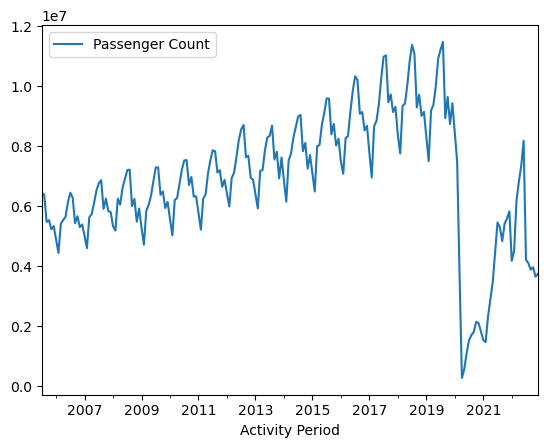

In [25]:
plt.figure(figsize=(20,8))
airtraffic_monthly.plot(kind='line')

In [26]:
# Univariate Time Series Forecasting - Data must be stationary. Stationary means contant mean, conatant variance and 
# constant covariance.

# Typically Time shoud not effect data is Stationarity.

# Time series with trends, or with seasonality, are not stationary - the trend and seasonality will affect the value of the time
# series at different times.

# Trends - Up, Down, Horizontal or Neutral

# Seasonality - Based on 4 seasons - Summer, Rainy, Spring, Winter.

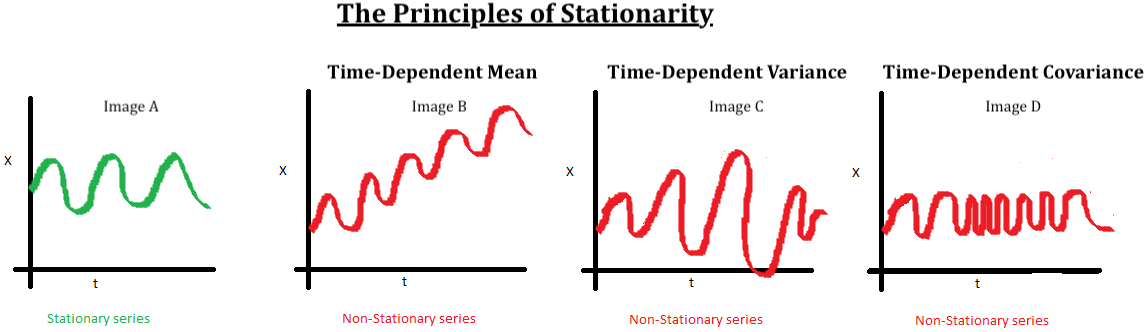

In [27]:
# Augmented Dickey Fuller Test of Stationarity - Identifies the whether the stationary data is Stationary or Not.
# Null - Unit Root Present or Data is not Stationary.
# Alt  - No Unit Root or Data is Stationary

# A unit root process is a data-generating process whose first difference is stationary. In other words, 
# a unit root process yt has the form.
# yt = yt-1 + stationary process.

# Interpretation is baesd on p-value
# p-value less than 0.05, Reject Null
# p-value greater than 0.05, Fail to Reject Null

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(airtraffic_monthly)
# Since the value of p = 0.1943512840260691 is greater than 0.05, fail to reject.

(-2.2333883757837953,
 0.1943512840260695,
 13,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 5779.9582584418)

In [30]:
# Kwiatkowaski-Phillips-Schmidt-Schmidt-Shin(KPSS) test for stationaryity.
# null hypothesis that x is level or trend stationary.
# Alt hypothessis that x is not level or not trend stationary.

from statsmodels.tsa.stattools import kpss

In [31]:
kpss(airtraffic_monthly)
# Since p-value = 0.1, is greater than 0.05, Fail to Reject Null.

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.30238701078218794,
 0.1,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [32]:
# if data is not staionary Differencing must be done
# y -          1,2,3,4,5,6,7,8,9,10
# lag 1 of y -  1,2,3,4,5,6,7,8,9,10
# lag 2 of y -   1,2,3,4,5,6,7,8,9,10

In [33]:
airtraffic_monthly_diff = airtraffic_monthly.diff()

In [34]:
airtraffic_monthly_diff = airtraffic_monthly_diff.dropna()

<Axes: xlabel='Activity Period'>

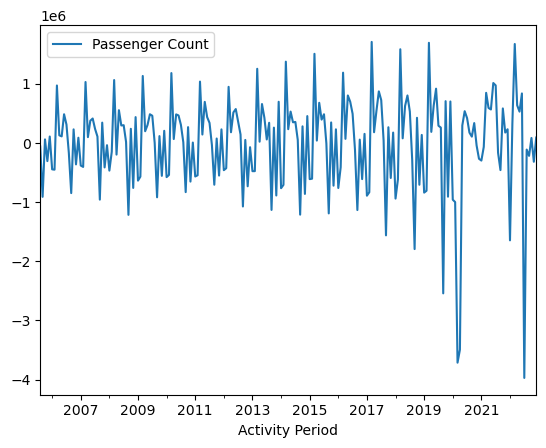

In [35]:
airtraffic_monthly_diff.plot(kind='line')

In [36]:
adfuller(airtraffic_monthly_diff)

(-3.927930603441323,
 0.001838642903212595,
 12,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 5754.590362505791)

In [37]:
kpss(airtraffic_monthly_diff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.05525286651495517,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [38]:
# Decomposition of Time Series - Breaking Time Series into components 
# a) Trend - Up, Down, Neutral or Horizontal
# b) Seasonal - Based on 4 Seasons
# c) Cyclicality - Long Term Trend (8-12 years) - Business Cycle
# d) Random or Residual - Error y and lagged values of y

# Holt - Winters Method of Decomposition
# Additive Model (Non Seasonal Data) - yt = Tr+St+Ct+Rt
# Multiplcative Model (Seasonal Data) - yt = Tr*St*Ct*Rt

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

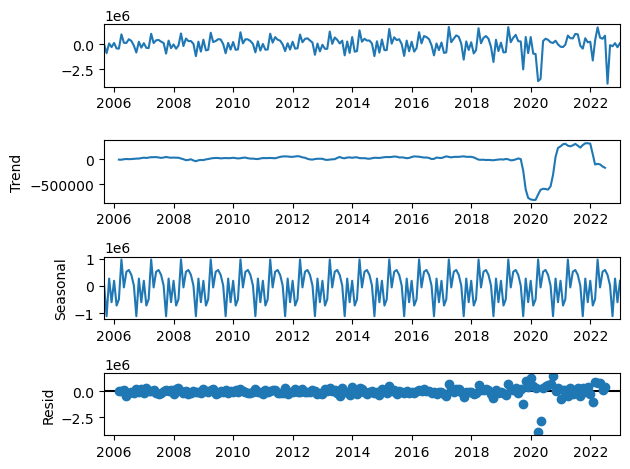

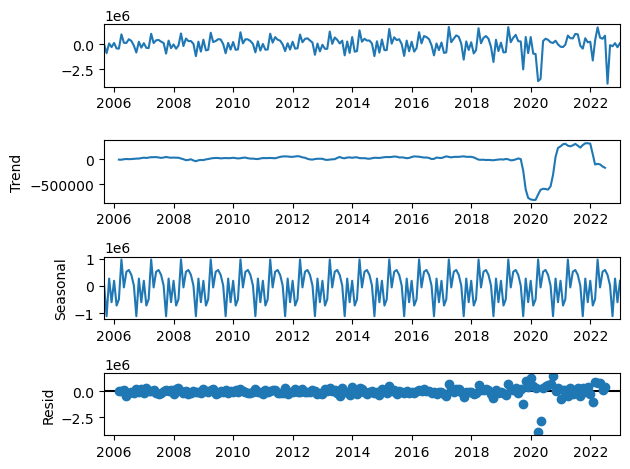

In [40]:
seasonal_decompose(airtraffic_monthly_diff).plot()

In [41]:
# Univariate Time Series Forecasting - Many methods are there like 
# Simple Moving Average, Exponential Moving Average, Exponential Smoothing, Holt Winters and most importantly ARIMA.

# ARIMA - Autoregressive Integrated Moving Average: is a linear regression model with 2 equations for forecasting for future 
# time periods based on historical time periods.

# 2 Types of ARIMA
# 1) Non Seasonal ARIMA - ARIMA(p,d,q) - p,d,q are lags between 0,0,0 till 5,2,5.
# 2) Seasonal ARIMA - SARIMAX(p,d,q)[P,D,Q][time frequency] are seasonal parameters

# AR(P) - Autoregressor is linear relationship between y and lagged values of y.
# I (d) - Integrated refers to differencing to be done to bring data to stationary.
# MA(q) - Moving Average is linear relationship between errors and lagged errors or residuals.

# In ARIMA identiying the values for p,d,q are very critical d is the differencing that is done that lies between 0 to 2.

# The ACF plot or Autocorrelation plot identiies the lag value for MA(q)
# The PACF plot or Partial Autocorrelation plot identiies the lag value for AR(p)

# Blue are depicts 95% confidence level and indicates significance.Anything within blue area is statistcally close to zero and 
# anything above is statistically close to non zero.

# From ACF plot the first lag where there is a big change - value of q 
# from PACF plot the first where in becomes negative - value of p

In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

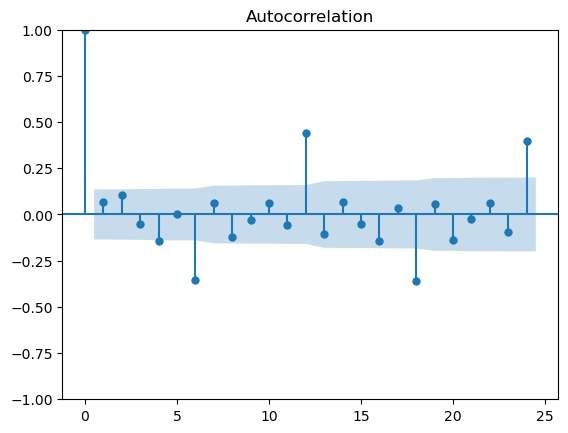

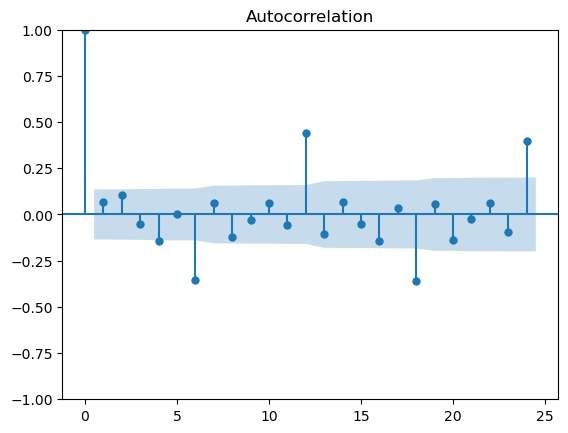

In [43]:
plot_acf(airtraffic_monthly_diff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


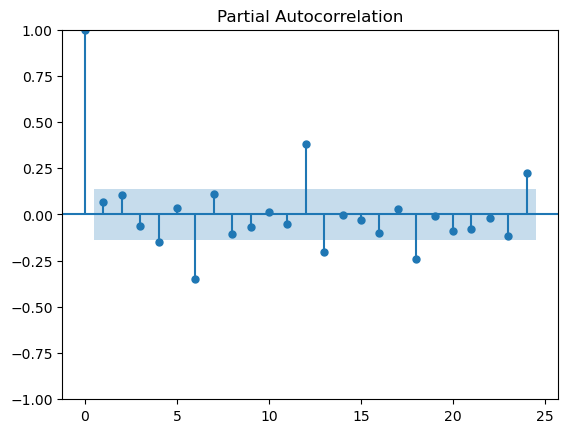

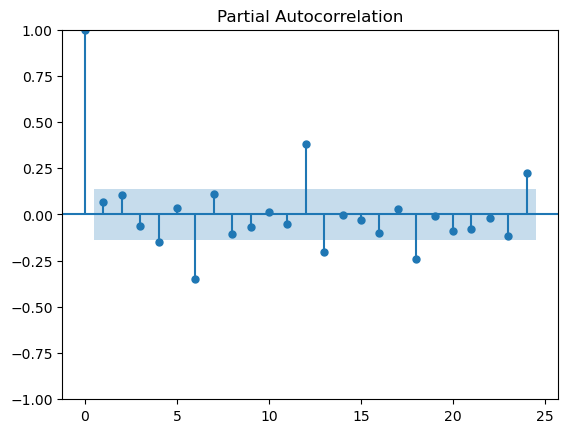

In [44]:
plot_pacf(airtraffic_monthly_diff)

In [46]:
from pmdarima.arima import auto_arima

In [47]:
arima_model = auto_arima(airtraffic_monthly, start_p=0, start_q = 0)

In [48]:
arima_model.summary()
# SARIMAX(0,1,0) = Non Seasonal Model
# AIC - 6279.860



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3138.930
Date:                Mon, 18 Sep 2023   AIC                           6279.860
Time:                        19:59:12   BIC                           6283.202
Sample:                    07-31-2005   HQIC                          6281.211
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.466e+11   3.27e+10     19.753      0.000    5.82e+11    7.11e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):               319.24
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               4.20   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# Ljung Box test of residulas

# null - Model doesnot show lac of fit or model if Fine
# Al   - Model Does show Lack of Fit or model is fron Fine.

# p-value must be greter than 0.05, Failto Reject null.

# Since Prob(Q): 0.34 is greater than 0.05, fail to Reject Null.

In [50]:
arima_model.predict(n_periods=24)

2023-01-31    3746158.0
2023-02-28    3746158.0
2023-03-31    3746158.0
2023-04-30    3746158.0
2023-05-31    3746158.0
2023-06-30    3746158.0
2023-07-31    3746158.0
2023-08-31    3746158.0
2023-09-30    3746158.0
2023-10-31    3746158.0
2023-11-30    3746158.0
2023-12-31    3746158.0
2024-01-31    3746158.0
2024-02-29    3746158.0
2024-03-31    3746158.0
2024-04-30    3746158.0
2024-05-31    3746158.0
2024-06-30    3746158.0
2024-07-31    3746158.0
2024-08-31    3746158.0
2024-09-30    3746158.0
2024-10-31    3746158.0
2024-11-30    3746158.0
2024-12-31    3746158.0
Freq: M, dtype: float64

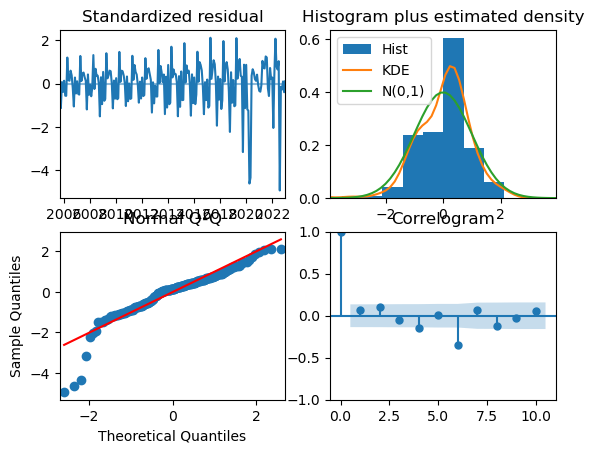

<Figure size 1800x600 with 0 Axes>

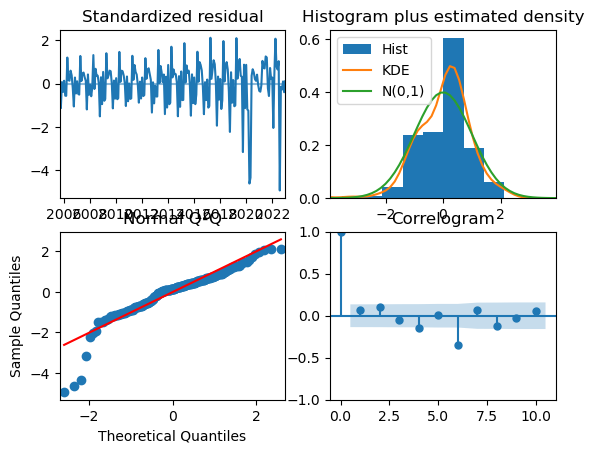

In [51]:
plt.figure(figsize=(18,6))
arima_model.plot_diagnostics()

In [52]:
index_of_fc = pd.date_range(airtraffic_monthly.index[-1],periods =24,freq='M')

In [53]:
arimapredict =  pd.DataFrame(arima_model.predict(n_periods=24))

In [54]:
arimapredict.index = index_of_fc

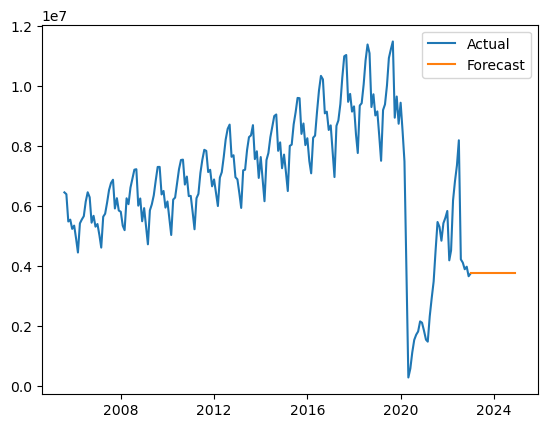

In [55]:
plt.plot(airtraffic_monthly,label='Actual')
plt.plot(arimapredict,label='Forecast')
plt.legend()
plt.show()

In [57]:
from prophet import Prophet

In [58]:
airtraffic_monthly =  airtraffic_monthly.reset_index()

In [59]:
airtraffic_monthly.columns=['ds','y']

In [60]:
airtraffic_monthly

,ds,y
0,2005-07-31,6451538
1,2005-08-31,6391732
2,2005-09-30,5481106
3,2005-10-31,5541430
4,2005-11-30,5234666
...,...,...
205,2022-08-31,4106428
206,2022-09-30,3888243
207,2022-10-31,3972446
208,2022-11-30,3654498


In [62]:
m = Prophet()
m.fit(airtraffic_monthly)

19:59:56 - cmdstanpy - INFO - Chain [1] start processing
19:59:56 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future = m.make_future_dataframe(periods=24,freq='M')

In [72]:
forecast = m.predict(future)
np.round(forecast[['ds','yhat','yhat_lower','yhat_upper']]).tail()

,ds,yhat,yhat_lower,yhat_upper
229,2024-08-31,3385909.0,1606627.0,5255722.0
230,2024-09-30,2312884.0,463475.0,4110042.0
231,2024-10-31,2436174.0,506736.0,4310508.0
232,2024-11-30,1800101.0,-76421.0,3777015.0
233,2024-12-31,1880311.0,-28372.0,3736251.0


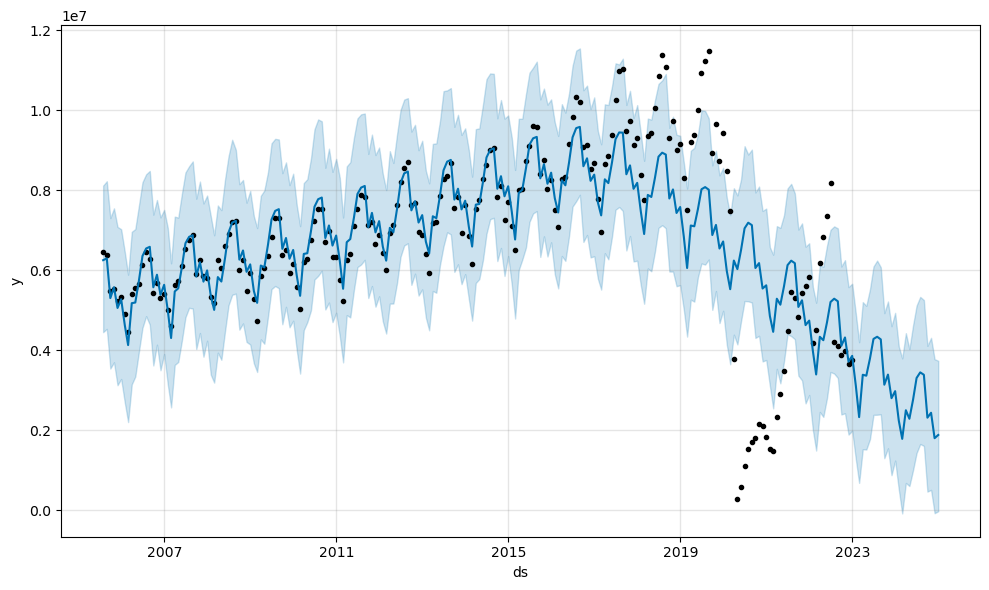

In [73]:
fig1 = m.plot(forecast)

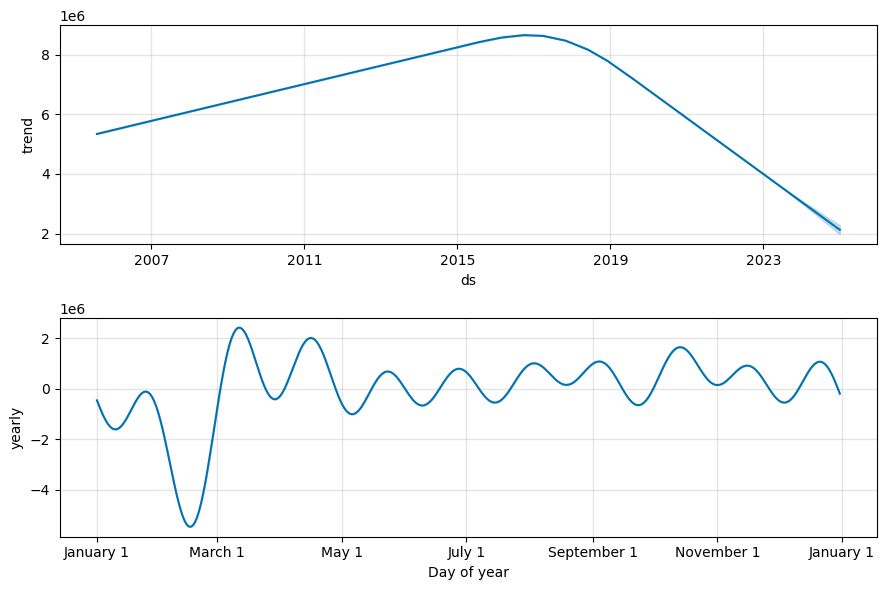

In [74]:
fig2 = m.plot_components(forecast)

In [68]:
from prophet.plot import plot_plotly, plot_components_plotly

In [75]:
plot_plotly(m,forecast)

In [76]:
plot_components_plotly(m,forecast)

C:\Users\Hp\anaconda3\lib\site-packages\plotly\io\_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.

